# Figure 5: Denmark Strait freshwater transport adjoint sensitivities

This notebook will reproduce Figure 5 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import sys
sys.path.insert(0,'/users/emmomp/Python/ECCOv4-py')
import ecco_v4_py as ecco
sys.path.insert(0,'/users/emmomp/Python')
import xadjoint as xad
import utils as ut
import calendar

In [2]:
ecco_grid=xr.open_dataset('~/data/orchestra/other_data/ECCO_r3_alt/ECCOv4r3_grid.nc') 
rootdir='/users/emmomp/data/canari/experiments/'
griddir = '/users/emmomp/data/orchestra/grid2/'
eyears=[2000,2006,2014]
mths=['Mar','Jun','Sep','Dec']
imth={'Mar':3,'Jun':6,'Sep':9,'Dec':12}
adj_freq=604800
nt=260
adj_vars=['adxx_qnet','adxx_empmr','adxx_tauu','adxx_tauv']

lags=[0,-0.25,-0.5,-1.5,-4]
lag_labels=['0 to -3m lag','-3 to -6m lag','-6 to -18m lag','-18m to -4y lag','0 to -4y lag']

ecco3d_ecco_map={'adxx_qnet':'EXFqnet','adxx_tauu':'oceTAUU','adxx_tauv':'oceTAUV',
                 'adxx_empmr':'EXFempmr'}

In [3]:
data_dir='/users/emmomp/data/canari/experiments/fwd_26y/'
ds_climanom=xr.open_dataset(f'{data_dir}/exf_climanoms.nc')
ds_climanom

<xarray.Dataset> Size: 6GB
Dimensions:   (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
               k_p1: 51, tile: 13, time: 1357)
Coordinates: (12/18)
  * i         (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j         (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g       (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k         (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...        ...
    YC        (tile, j, i) float32 421kB ...
    CS        (tile, j, i) float32 421kB ...
    SN        (tile, j, i) float32 421kB ...
    rA        (tile, j, i) float32 421kB ...
    Depth     (tile, j, i) float32 421kB ...
    month     (time) int64 11kB ...
Data variables:
    EXFqnet   (time, tile, j, i) float32 572MB ...
    EXFempmr  (time, tile, j, i) float32 572MB ...
    EXFtaux   (time, tile, j, i_g) float32 572MB ...
    EXFtauy   (time, tile, j_g, i) float32 572MB ...
    oceTAUX   (time, tile, j, i_g) float32 572MB ...
    oceTAUY   (time, tile, j_g, i) float32 572MB ...
    EXFtauu   (time, tile, j, i) float32 572MB ...
    EXFtauv   (time, tile, j, i) float32 572MB ...
    oceTAUU   (time, tile, j, i) float32 572MB ...
    oceTAUV   (time, tile, j, i) float32 572MB ...

In [4]:
ds_ca_seasvar=ds_climanom.groupby(ds_climanom.time.dt.season).var('time')
ds_ca_seasvar

<xarray.Dataset> Size: 19MB
Dimensions:   (season: 4, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, k: 50,
               k_u: 50, k_l: 50, k_p1: 51)
Coordinates: (12/16)
  * i         (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j         (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g       (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k         (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...        ...
    YC        (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    CS        (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    SN        (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    rA        (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    Depth     (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * season    (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    EXFqnet   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFempmr  (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtaux   (season, tile, j, i_g) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtauy   (season, tile, j_g, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUX   (season, tile, j, i_g) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUY   (season, tile, j_g, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtauu   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtauv   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUU   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUV   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [5]:
NA=(ds_climanom.XC>-60)&(ds_climanom.XC<0)&(ds_climanom.YC>50)
ds_ca_monvar=ds_climanom.groupby(ds_climanom.time.dt.month).var('time')
ds_NA=ds_ca_monvar.where(NA).weighted(ds_ca_monvar.rA).mean(['tile','j','i'])

Text(0, 0.5, 'Regional Mean Variance')

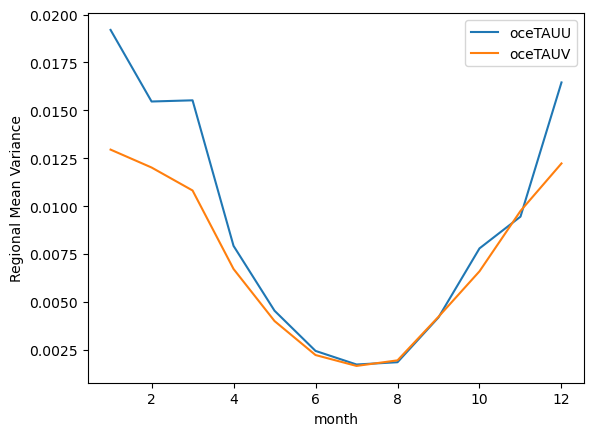

In [6]:
ds_NA['oceTAUU'].plot(x='month')
ds_NA['oceTAUV'].plot(x='month')
plt.legend(['oceTAUU','oceTAUV'])
plt.ylabel('Regional Mean Variance')

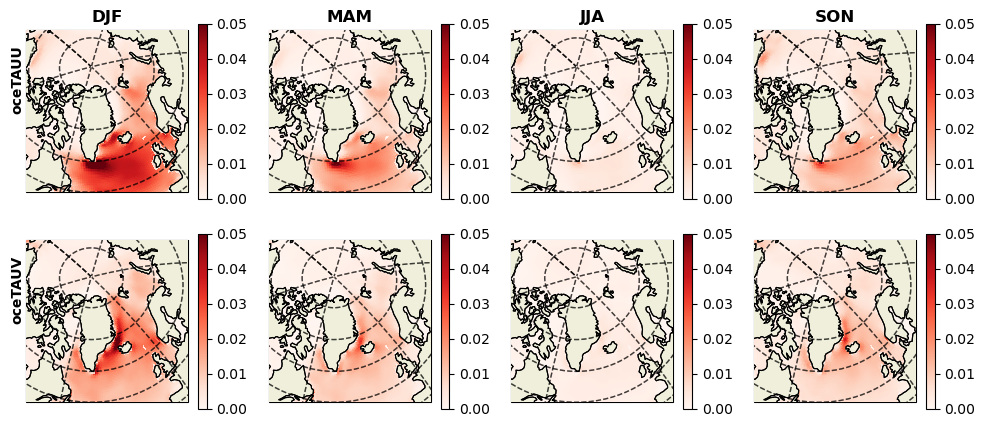

In [42]:
xmin,xmax,ymin,ymax=(-2266791.253073855,
 3358349.2597455736,
 -2166791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)

q_labels=['JFM','AMJ','JAS','OND']
plt.figure(figsize=[12,5])
pp=1
for var in ['oceTAUU','oceTAUV']:
    for seas in ['DJF','MAM','JJA','SON']:
        [f,ax,p]=ut.plot_ecco(ecco_grid,ds_ca_seasvar[var].sel(season=seas),subplot_grid=[2,4,pp],
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=0.05,
                              cmap='Reds'
                      )   
        if var=='oceTAUU':
            ax.set_title(seas,fontweight='bold')
        if seas=='DJF':
            ax.text(-0.1,0.5,var,fontweight='bold',transform=ax.transAxes,rotation=90)
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        pp+=1

In [14]:
ds_all={}
for mth in mths:
    ds_all[mth]={}
    for year in eyears:
        expt=f'ad_5y_denstr_horflux_fw_{mth}_noparam_7d_{year}/'
        startdate=f'{year-4}-01-01'
        lag0=f'{year}-{imth[mth]:02.0f}-{calendar.monthrange(int(year),imth[mth])[1]}'
        print(expt,startdate,lag0)
        myexp = xad.Experiment(griddir,rootdir+expt,start_date=startdate,lag0=lag0,nt=nt,adj_freq=adj_freq)
        myexp.load_vars(['adxx_qnet','adxx_tauu','adxx_tauv','adxx_empmr'])
    
        myexp.data['adxx_tauu']=-myexp.data['adxx_tauu'].rename({'i_g':'i'})
        myexp.data['adxx_tauv']=-myexp.data['adxx_tauv'].rename({'j_g':'j'})
    
        myexp.data=myexp.data.assign_coords({'eyear':year,'month':mth,'fc':myexp.fc}).swap_dims({'time':'lag_years'})
        ds_all[mth][year]=myexp.data
#ds_all

ad_5y_denstr_horflux_fw_Mar_noparam_7d_2000/ 1996-01-01 2000-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Mar_noparam_7d_2006/ 2002-01-01 2006-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Mar_noparam_7d_2014/ 2010-01-01 2014-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Jun_noparam_7d_2000/ 1996-01-01 2000-06-30
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Jun_noparam_7d_2006/ 2002-01-01 2006-06-30
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_ho

In [15]:
ds_plot_all=[]
for iv,var in enumerate(adj_vars):
    ds_plot_exp=[]
    for mth in mths:
        ds_plot_mth=[]
        for year in eyears:
            ds_plot_year=[]
            for ilag in range(0,len(lags)-1):
                ds_plot=ds_all[mth][year][var].sel(lag_years=slice(lags[ilag+1],lags[ilag])).mean('lag_years').squeeze()/ds_all[mth][year].fc
                ds_plot['lag_range']=lag_labels[ilag]
                ds_plot_year.append(ds_plot)
            ilag+=1
            ds_plot=ds_all[mth][year][var].sel(lag_years=slice(lags[-1],0)).mean('lag_years').squeeze()/ds_plot.fc
            ds_plot['lag_range']=lag_labels[-1]
            ds_plot_year.append(ds_plot)
            ds_plot_mth.append(xr.concat(ds_plot_year,'lag_range'))
        ds_plot_exp.append(xr.concat(ds_plot_mth,'eyear'))
    ds_plot_exp=xr.concat(ds_plot_exp,'month')
    ds_plot_exp.name=var
    ds_plot_all.append(ds_plot_exp)
ds_plot_all=xr.merge(ds_plot_all).load()
ds_plot_all

<xarray.Dataset>
Dimensions:     (tile: 13, j: 90, i: 90, eyear: 3, month: 4, lag_range: 5)
Coordinates:
  * tile        (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j           (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i           (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * eyear       (eyear) int64 2000 2006 2014
  * month       (month) <U3 'Mar' 'Jun' 'Sep' 'Dec'
    fc          (month, eyear) float64 -1.083e+05 -8.207e+04 ... -5.189e+04
  * lag_range   (lag_range) <U15 '0 to -3m lag' ... '0 to -4y lag'
Data variables:
    adxx_qnet   (month, eyear, lag_range, tile, j, i) float64 -0.0 -0.0 ... -0.0
    adxx_empmr  (month, eyear, lag_range, tile, j, i) float64 -0.0 -0.0 ... -0.0
    adxx_tauu   (month, eyear, lag_range, tile, j, i) float64 -0.0 -0.0 ... -0.0
    adxx_tauv   (month, eyear, lag_range, tile, j, i) float64 -0.0 -0.0 ... -0.0

In [39]:
xmin,xmax,ymin,ymax=(-2266791.253073855,
 3358349.2597455736,
 -2166791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)
[section_pt1,section_pt2]=ecco.get_section_endpoints('Denmark Strait')
exf_units=dict(zip(adj_vars,['W/m$^2$','m/s','m$^2$/s','m$^2$/s']))
exf_labels=dict(zip(adj_vars,['Net Heat Flux','Net Freshwater Flux','Zonal Wind Stress','Meridional Wind Stress']))
clims=dict(zip(adj_vars,[[0.001,6e-4,3e-4,1e-4],[1e3,600,250,75],[2e-3,6e-4,2e-4,6e-5],[2e-3,6e-4,2e-4,6e-5]]))
var_clims=dict(zip(adj_vars,[25e3,4e-15,0.03,0.03]))

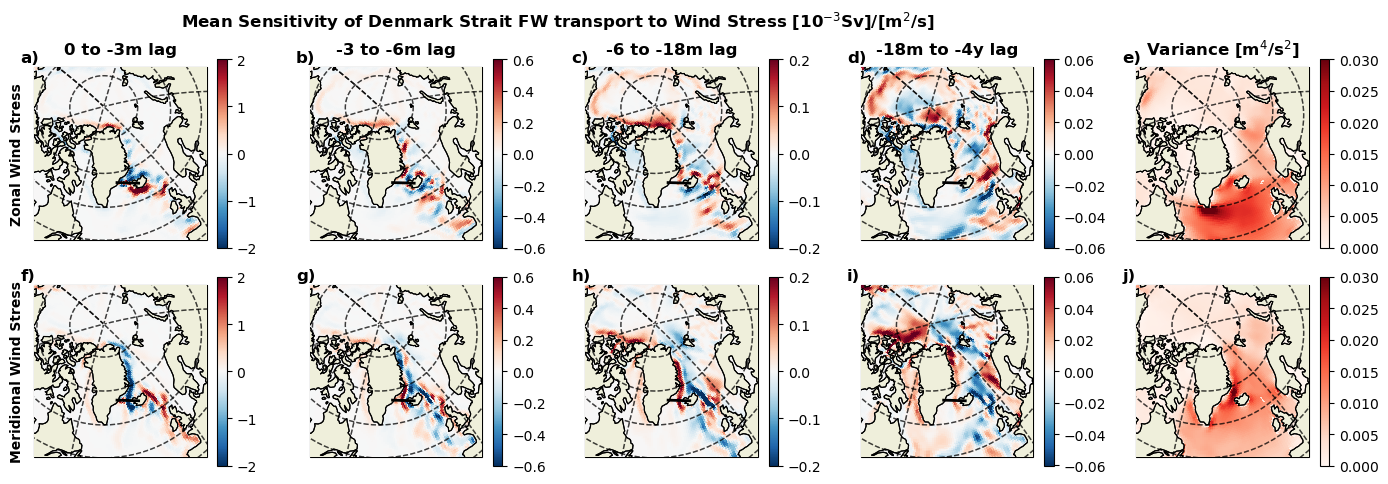

In [53]:
fig=plt.figure(figsize=[14,5])
pp=1
for iv,var in enumerate(adj_vars[2:]): 
    mth_mean=1e3*ds_plot_all[var].mean(['eyear','month'])
    var_var=ds_climanom[ecco3d_ecco_map[var]].sel(time=slice('1996-01-01',None)).var('time')
    for ilag in range(0,len(lags)-1):
        [f,ax,p]=ut.plot_ecco(ecco_grid,mth_mean.isel(lag_range=ilag),subplot_grid=[2,5,pp],
                           **proj_dict,rasterized=True,
                           cmin=-clims[var][ilag]*1e3,cmax=clims[var][ilag]*1e3
                          )
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
             color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
        plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        if pp<6:
            plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.03)
        if ilag==0:
            ax.text(-0.1,0.5,f'{exf_labels[var]}',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
        pp+=1
    [f,ax,p]=ut.plot_ecco(ecco_grid,var_var,subplot_grid=[2,5,pp],
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=var_clims[var],cmap='Reds'
                      )    
    ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
    plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    if pp<6:
        plt.title('Variance [m$^4$/s$^2$]',fontsize=12,fontweight='bold',y=1.03)
    pp+=1
    
plt.suptitle('Mean Sensitivity of Denmark Strait FW transport to Wind Stress [10$^{-3}$Sv]/[m$^2$/s]',fontsize=12,fontweight='bold',y=0.96,x=0.4)
plt.tight_layout()
plt.savefig('../plots/fig5_meanwindstressadxx_vslag.pdf')

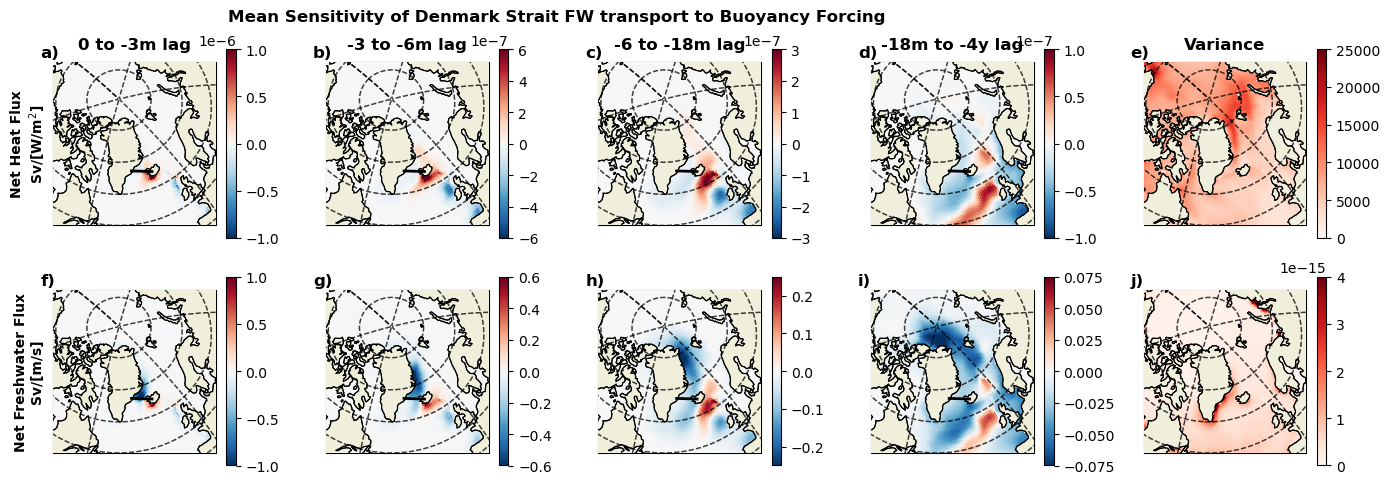

In [54]:
fig=plt.figure(figsize=[14,5])
pp=1
for iv,var in enumerate(adj_vars[:2]): 
    mth_mean=ds_plot_all[var].mean(['eyear','month'])
    var_var=ds_climanom[ecco3d_ecco_map[var]].sel(time=slice('1996-01-01',None)).var('time')
    for ilag in range(0,len(lags)-1):
        [f,ax,p]=ut.plot_ecco(ecco_grid,mth_mean.isel(lag_range=ilag),subplot_grid=[2,5,pp],
                           **proj_dict,rasterized=True,
                           cmin=-clims[var][ilag]/1e3,cmax=clims[var][ilag]/1e3
                          )
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
             color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
        plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        if pp<6:
            plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.03)
        if ilag==0:
            ax.text(-0.15,0.5,f'{exf_labels[var]}\nSv/[{exf_units[var]}]',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
        pp+=1
    [f,ax,p]=ut.plot_ecco(ecco_grid,var_var,subplot_grid=[2,5,pp],
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=var_clims[var],cmap='Reds'
                      )    
    ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
    plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    if pp<6:
        plt.title('Variance',fontsize=12,fontweight='bold',y=1.03)
    pp+=1
    
plt.suptitle(f'Mean Sensitivity of Denmark Strait FW transport to Buoyancy Forcing',fontsize=12,fontweight='bold',x=0.4,y=0.96)
plt.tight_layout()
plt.savefig('../plots/fig5_meanbuoyancyadxx_vslag.pdf')